<a href="https://colab.research.google.com/github/Yashodha-kapali8/ML_Programs/blob/main/Polynomial_regression_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** ACTIVITY POLYNOMIAL REGRESSION:**

1. Run the code by changing the value of degree variable and observe the plot and write the observation
2. Implement on Auto MPG Dataset



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

### PART 1: Polynomial Regression on Temperature vs Pressure
# Assumes testdata.csv is already present in the Colab environment
df = pd.read_csv('testdata.csv')

temperature = df.iloc[:, 1:2].values  # Input
pressure = df.iloc[:, 2].values       # Output

# Try different degrees: 1, 2, 3, 4, 5
degree = 3
polyreg = PolynomialFeatures(degree=degree)
X_poly = polyreg.fit_transform(temperature)

linreg = LinearRegression()
linreg.fit(X_poly, pressure)
predicted_pressure = linreg.predict(X_poly)


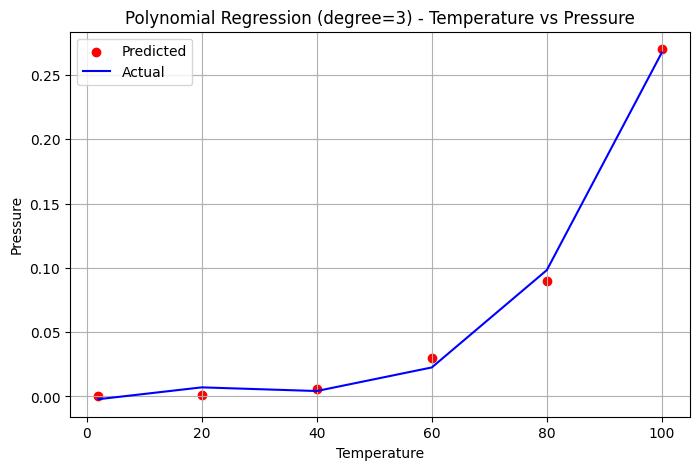

Temperature vs Pressure - Degree 3 - MSE: 0.00


In [9]:
# Plot
plt.figure(figsize=(8, 5))
plt.scatter(temperature, pressure, color='red')
plt.plot(temperature, predicted_pressure, color='blue')
plt.title(f'Polynomial Regression (degree={degree}) - Temperature vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.grid(True)
plt.legend(['Predicted', 'Actual'])
plt.show()

print(f"Temperature vs Pressure - Degree {degree} - MSE: {mean_squared_error(pressure, predicted_pressure):.2f}")



In [13]:
### PART 2: Polynomial Regression on Auto MPG Dataset
# Assumes auto-mpg.csv is already present in Colab
auto_df = pd.read_csv('auto-mpg.csv')

# Clean and preprocess
auto_df.replace('?', np.nan, inplace=True)
auto_df.dropna(inplace=True)
auto_df['horsepower'] = auto_df['horsepower'].astype(float)

X = auto_df[['horsepower']].values
y = auto_df['mpg'].values

degree_auto = 2
polyreg_auto = PolynomialFeatures(degree=degree_auto)
X_poly_auto = polyreg_auto.fit_transform(X)

linreg_auto = LinearRegression()
linreg_auto.fit(X_poly_auto, y)
predicted_mpg = linreg_auto.predict(X_poly_auto)


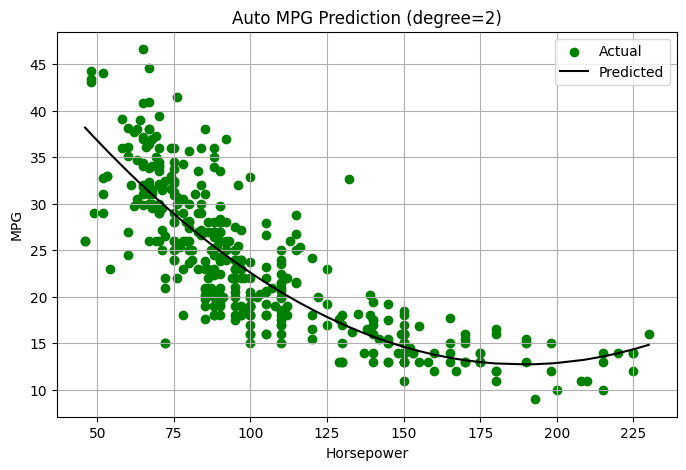

Auto MPG - Degree 2 - MSE: 19.17


In [14]:
# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='green', label='Actual')
sorted_zip = sorted(zip(X[:, 0], predicted_mpg))
X_sorted, y_pred_sorted = zip(*sorted_zip)
plt.plot(X_sorted, y_pred_sorted, color='black', label='Predicted')
plt.title(f'Auto MPG Prediction (degree={degree_auto})')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid(True)
plt.legend()
plt.show()

print(f"Auto MPG - Degree {degree_auto} - MSE: {mean_squared_error(y, predicted_mpg):.2f}")